In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
PATH_DATA = "./datasets/titanic"

# Download the dataset

In [3]:
!kaggle competitions download -c titanic -p {PATH_DATA}

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -n {PATH_DATA}/titanic.zip -d {PATH_DATA}

Archive:  ./datasets/titanic/titanic.zip
  inflating: ./datasets/titanic/gender_submission.csv  
  inflating: ./datasets/titanic/test.csv  
  inflating: ./datasets/titanic/train.csv  


# EDA

## Quick look

In [5]:
df_raw = pd.read_csv(f'{PATH_DATA}/train.csv')

In [6]:
df_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Quick, Miss. Phyllis May",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


### Drop unique features

In [8]:
# PassengerId and Name are unique. Drop them before our EDA
cols = ['PassengerId', 'Name']
# Ticket (ticket number) and Cabin (cabin number) are almost unique. Drop them too
cols += (['Ticket', 'Cabin'])

# Make a copy so we won't accidentally modify the raw dataset
df = df_raw.drop(cols, axis=1).copy()

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Numerical variables

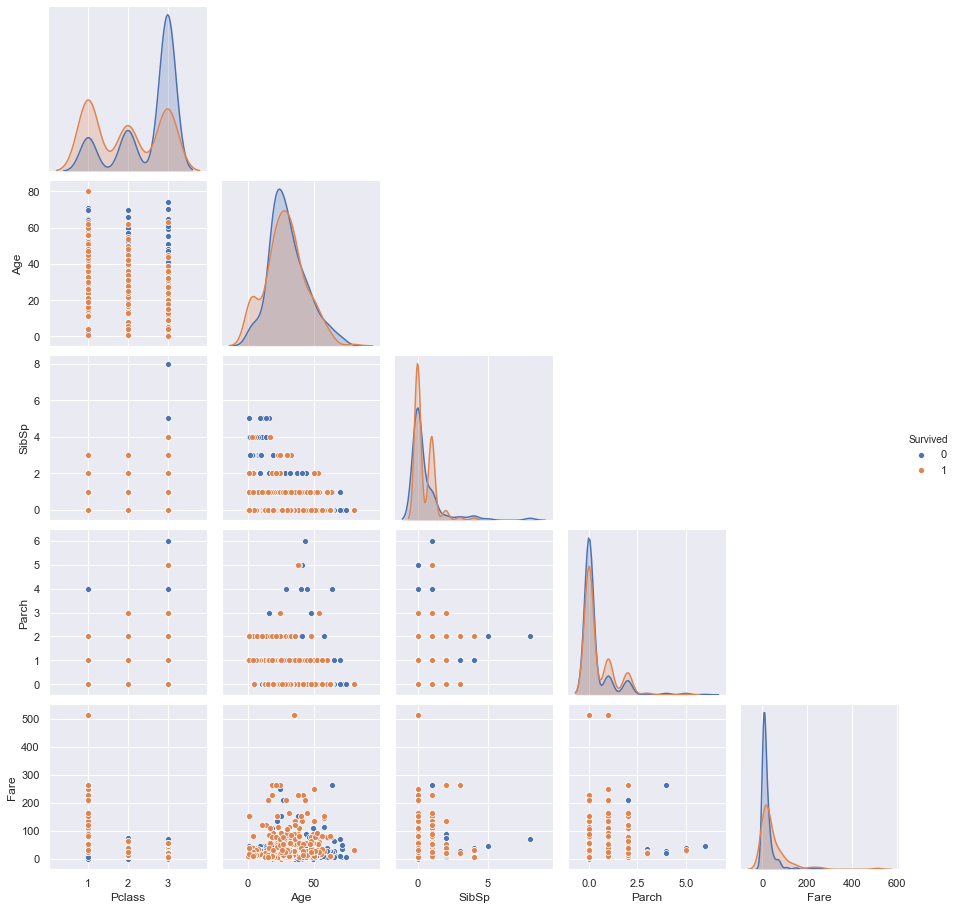

In [10]:
sns.pairplot(df, hue='Survived', corner=True);

**Comment:** If we consider the features separately, we can see that there are much more survivors in Ticket Class 1 (Pclass) and children (Age).

## Categorical variables

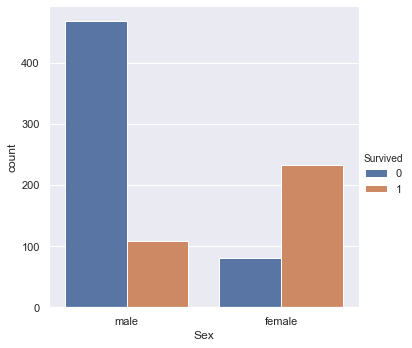

In [11]:
sns.catplot(x='Sex', kind='count', hue='Survived', data=df)

**Comment:** Female has a higher chance to survive than male

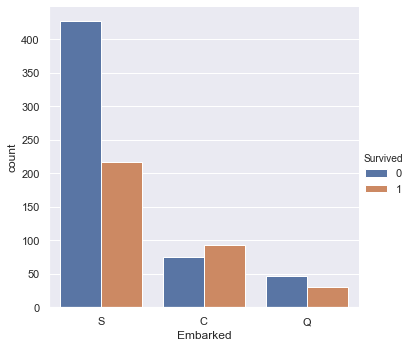

In [12]:
sns.catplot(x='Embarked', kind='count', hue='Survived', data=df)

**Comment:** Passengers aboard from Southampton has the lowest survival rate